In [780]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from matplotlib.pyplot import cm
import string

In [816]:
def plot_data(df, stat, color):
    xs = df[stat]
    bins = np.linspace(-3.0, 3.0, num=30)
    plt.hist(xs, bins=bins, color=color)
    plt.title(stat)
    # try:
    #     plt.savefig(f'{stat}_single_std_data.png')
    # except:
    #     pass
    plt.show()


def data_by_std(df, std_stat):
    stds = [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]
    dfs = []
    for std in stds:
        dfs.append(df[df['MP'] > std])
    return dfs


def gather_target_stat_data(target_stat, df):
    stat_dfs = []
    x = 0
    for df in dfs:
        stat_dfs.append(df[target_stat])
        stat_dfs[x].dropna()
        x += 1
    return stat_dfs


def standerdize_data_length(stat_dfs):
    standerdizers = []
    x = 0
    for df in stat_dfs:
        standerdizers.append(len(stat_dfs[0]) / len(normalized_player_summed))
        stat_dfs[x] = df.sample(frac=standerdizers[x], replace=True)
        x += 1
    return stat_dfs


def plot_stat_data_by_std(stat_dfs, title):
    fig, axs = plt.subplots(4, 3)
    x = 0
    y = 0
    plt.title(title)
    bins = np.linspace(-3.0, 3.0, num=30)
    color = iter(cm.rainbow(np.linspace(0, 1, 16)))
    for df in stat_dfs:
        axs[x, y].hist(x=df, bins=bins, color=next(color))
        x += 1
        if x == 4:
            x = 0
            y += 1


In [782]:
csv = r"C:\Users\jleus\OneDrive\Documents\NBA Visualization\League2015cleaned.csv"
df = pd.read_csv(csv)
df

c:\users\jleus\appdata\roaming\jetbrains\jetbrainsds2021.3\projects\workspace\venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Name,G,Date,Age,Tm,Location,Opp,GS,Active,MP,...,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,GmID,WL
0,"Barbosa, Leandro",1.0,20141029.0,31335.0,GSW,0,SAC,18.0,1,1426.0,...,12.6,0.0,5.5,20.0,15.0,82.0,83.0,-4.5,20141130,1
1,"Barbosa, Leandro",2.0,20141101.0,31338.0,GSW,1,LAL,23.0,1,1726.0,...,23.6,2.7,0.0,25.3,28.4,94.0,107.0,-5.4,20141202,1
2,"Barbosa, Leandro",3.0,20141102.0,31339.0,GSW,0,POR,5.0,1,1541.0,...,14.8,0.0,0.0,9.2,31.1,118.0,99.0,6.8,20141203,1
3,"Barbosa, Leandro",4.0,20141105.0,31342.0,GSW,1,LAC,17.0,1,1743.0,...,9.2,2.7,0.0,11.3,22.7,140.0,104.0,6.4,20141206,1
4,"Barbosa, Leandro",5.0,20141108.0,31345.0,GSW,0,HOU,11.0,1,1818.0,...,16.9,2.6,0.0,27.3,23.9,66.0,87.0,-6.2,20141209,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35360,"Wear, Travis",NaN,20150408.0,24199.0,NYK,1,IND,-16.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150538,0
35361,"Wear, Travis",NaN,20150410.0,24201.0,NYK,1,MIL,-8.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150540,0
35362,"Wear, Travis",NaN,20150411.0,24202.0,NYK,0,ORL,1.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150541,1
35363,"Wear, Travis",NaN,20150413.0,24204.0,NYK,0,ATL,4.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150543,1


In [783]:

for x in range(len(df)):
    #MP
    newmp = 0
    mp = df.loc[x, 'MP']
    mp = str(mp)
    mp = list(mp)
    mp.pop(-1)
    mp.pop(-1)
    if len(mp) == 1 and mp != ['n']:
        newmp = int(mp[0])
    elif len(mp) == 2:
        newmp = 10*int(mp[0]) + int(mp[1])
    elif len(mp) == 3:
        newmp = 60*int(mp[0]) + 10*int(mp[1]) + int(mp[2])
    elif len(mp) == 4:
        newmp = 600*int(mp[0]) + 60*int(mp[1]) + 10*int(mp[2]) + int(mp[3])
    else:
        newmp = 'NaN'
    df.at[x, 'MP'] = newmp
    #Age
    newage = 0
    age = df.loc[x, 'Age']
    age = str(age)
    age = list(age)
    age.pop(-1)
    age.pop(-1)
    newage = 3650*int(age[0]) + 365*int(age[1]) + 100*int(age[2]) + 10*int(age[3]) + int(age[4])
    df.at[x, 'Age'] = newage


In [784]:
df_means = df.mean()
print(df_means['MP'])
df['adj_ORtg'] = 0.0
for x in range(len(df)):
    adj_ortg = 0
    ortg = df.loc[x, 'ORtg']
    mp = df.loc[x, 'MP']
    adj_ortg = (ortg*mp) / (df_means['MP'])
    df.at[x, 'adj_ORtg'] = adj_ortg


C:\Users\jleus\AppData\Local\Temp/ipykernel_5840/4220295823.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_means = df.mean()


1377.2983175235195


In [785]:
df

,Name,G,Date,Age,Tm,Location,Opp,GS,Active,MP,...,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,GmID,WL,adj_ORtg
0,"Barbosa, Leandro",1.0,20141029.0,11650.0,GSW,0,SAC,18.0,1,866.0,...,0.0,5.5,20.0,15.0,82.0,83.0,-4.5,20141130,1,51.558910
1,"Barbosa, Leandro",2.0,20141101.0,11653.0,GSW,1,LAL,23.0,1,1046.0,...,2.7,0.0,25.3,28.4,94.0,107.0,-5.4,20141202,1,71.389037
2,"Barbosa, Leandro",3.0,20141102.0,11654.0,GSW,0,POR,5.0,1,941.0,...,0.0,0.0,9.2,31.1,118.0,99.0,6.8,20141203,1,80.620152
3,"Barbosa, Leandro",4.0,20141105.0,11657.0,GSW,1,LAC,17.0,1,1063.0,...,2.7,0.0,11.3,22.7,140.0,104.0,6.4,20141206,1,108.052118
4,"Barbosa, Leandro",5.0,20141108.0,11660.0,GSW,0,HOU,11.0,1,1098.0,...,2.6,0.0,27.3,23.9,66.0,87.0,-6.2,20141209,1,52.616052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35360,"Wear, Travis",NaN,20150408.0,8959.0,NYK,1,IND,-16.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150538,0,NaN
35361,"Wear, Travis",NaN,20150410.0,8961.0,NYK,1,MIL,-8.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150540,0,NaN
35362,"Wear, Travis",NaN,20150411.0,8962.0,NYK,0,ORL,1.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150541,1,NaN
35363,"Wear, Travis",NaN,20150413.0,8964.0,NYK,0,ATL,4.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150543,1,NaN


In [786]:
currentplayer = df.loc[0, 'Name']
players = [currentplayer]
row = 1
while True:
    if df.loc[row, 'Name'] != currentplayer:
        currentplayer = df.loc[row, 'Name']
        players.append(currentplayer)
    row += 1
    if row == len(df) - 1:
        break


In [787]:
currentteam = df.loc[0, 'Tm']
teams = [currentteam]
row = 1
while True:
    if df.loc[row, 'Tm'] != currentteam:
        currentteam = df.loc[row, 'Tm']
        teams.append(currentteam)
    row += 1
    if row == len(df) - 1:
        break

In [788]:
teams

['GSW',
 'LAC',
 'DAL',
 'OKC',
 'TOR',
 'HOU',
 'SAS',
 'CLE',
 'POR',
 'ATL',
 'PHO',
 'DEN',
 'BOS',
 'SAC',
 'CHI',
 'NOP',
 'WAS',
 'LAL',
 'DET',
 'MEM',
 'BRK',
 'MIN',
 'MIL',
 'IND',
 'ORL',
 'UTA',
 'MIA',
 'CHO',
 'PHI',
 'NYK']

In [789]:
target_columns = ['Age', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'ORtg', 'DRtg', 'BPM', 'adj_ORtg', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%']




In [790]:
player_summed = pd.DataFrame()
for stat in target_columns:
    player_summed[stat] = 0
player_summed['Name'] = ''
player_summed['Tm'] = ''
player_summed['PlayerID'] = 0
player_summed['Games'] = 0


In [791]:
for index, row in df.iterrows():
    print(row)
    break

Name        Barbosa, Leandro
G                        1.0
Date              20141029.0
Age                  11650.0
Tm                       GSW
Location                   0
Opp                      SAC
GS                      18.0
Active                     1
MP                     866.0
FG                       2.0
FGA                      4.0
FG%                      0.5
3P                       0.0
3PA                      1.0
3P%                      0.0
FT                       0.0
FTA                      0.0
FT%                      NaN
ORB                      0.0
DRB                      1.0
TRB                      1.0
AST                      1.0
STL                      0.0
BLK                      1.0
TOV                      1.0
PF                       5.0
PTS                      4.0
GmSc                     0.7
+/-                      2.0
PlayerID                1001
TmID                     101
TS%                      0.5
eFG%                     0.5
ORB%          

In [792]:
df

,Name,G,Date,Age,Tm,Location,Opp,GS,Active,MP,...,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,GmID,WL,adj_ORtg
0,"Barbosa, Leandro",1.0,20141029.0,11650.0,GSW,0,SAC,18.0,1,866.0,...,0.0,5.5,20.0,15.0,82.0,83.0,-4.5,20141130,1,51.558910
1,"Barbosa, Leandro",2.0,20141101.0,11653.0,GSW,1,LAL,23.0,1,1046.0,...,2.7,0.0,25.3,28.4,94.0,107.0,-5.4,20141202,1,71.389037
2,"Barbosa, Leandro",3.0,20141102.0,11654.0,GSW,0,POR,5.0,1,941.0,...,0.0,0.0,9.2,31.1,118.0,99.0,6.8,20141203,1,80.620152
3,"Barbosa, Leandro",4.0,20141105.0,11657.0,GSW,1,LAC,17.0,1,1063.0,...,2.7,0.0,11.3,22.7,140.0,104.0,6.4,20141206,1,108.052118
4,"Barbosa, Leandro",5.0,20141108.0,11660.0,GSW,0,HOU,11.0,1,1098.0,...,2.6,0.0,27.3,23.9,66.0,87.0,-6.2,20141209,1,52.616052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35360,"Wear, Travis",NaN,20150408.0,8959.0,NYK,1,IND,-16.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150538,0,NaN
35361,"Wear, Travis",NaN,20150410.0,8961.0,NYK,1,MIL,-8.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150540,0,NaN
35362,"Wear, Travis",NaN,20150411.0,8962.0,NYK,0,ORL,1.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150541,1,NaN
35363,"Wear, Travis",NaN,20150413.0,8964.0,NYK,0,ATL,4.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150543,1,NaN


In [793]:
PlayerID = 1001
z = 0
row = 0
currentplayer = df.loc[0, 'Name']
while True:
    player_rows = []
    while True:
        if df.loc[row, 'Name'] != currentplayer:
            player = df.loc[row - 1, 'Name']
            team = df.loc[row - 1, 'Tm']
            currentplayer = df.loc[row, 'Name']
            break
        player_rows.append(row)
        row += 1
        if row >= len(df):
            break
    if row >= len(df):
        break
    player_df = df[player_rows[0]:player_rows[-1]]
    player_df = player_df[target_columns]
    summed_stats = player_df.sum()
    #print(summed_stats)
    # if len(player_df) > 0:
    for stat in target_columns:
        player_summed.at[z, stat] = summed_stats[stat]
    player_summed.at[z, 'Name'] = player
    player_summed.at[z, 'Tm'] = team
    player_summed.at[z, 'PlayerID'] = PlayerID
    player_summed.at[z, 'Games'] = len(player_rows)
    PlayerID += 1
    z += 1



In [794]:
player_summed

,Age,GS,MP,FG,FGA,3P,3PA,FT,FTA,ORB,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,Name,Tm,PlayerID,Games
0,950570.0,821.0,57535.0,178.0,376.0,43.0,109.0,58.0,72.0,23.0,...,356.9,940.3,133.3,33.4,510.2,1358.3,"Barbosa, Leandro",GSW,1001.0,82.0
1,669662.0,821.0,138059.0,311.0,648.0,85.0,213.0,108.0,150.0,115.0,...,841.6,561.1,108.3,50.6,728.1,1210.1,"Barnes, Harrison",GSW,1002.0,82.0
2,891440.0,821.0,93981.0,199.0,354.0,0.0,0.0,22.0,42.0,140.0,...,1285.7,1006.1,83.1,399.7,1442.8,919.4,"Bogut, Andrew",GSW,1003.0,82.0
3,794159.0,821.0,155634.0,649.0,1331.0,284.0,642.0,308.0,337.0,54.0,...,549.4,3073.4,235.6,36.5,1141.4,2291.6,"Curry, Stephen",GSW,1004.0,82.0
4,746693.0,821.0,29306.0,73.0,134.0,0.0,0.0,46.0,72.0,58.0,...,705.0,133.2,33.0,284.4,644.3,775.2,"Ezeli, Festus",GSW,1005.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,268297.0,-333.0,25390.0,73.0,181.0,26.0,70.0,64.0,82.0,14.0,...,157.1,392.2,28.5,12.7,145.8,418.4,"Shved, Alexey",NYK,1562.0,29.0
562,384031.0,-275.0,37114.0,101.0,251.0,32.0,90.0,27.0,39.0,4.0,...,122.0,544.8,35.0,11.7,342.3,567.8,"Smith, JR",NYK,1563.0,37.0
563,853916.0,-742.0,105756.0,254.0,583.0,15.0,42.0,124.0,149.0,98.0,...,853.6,997.9,72.9,154.4,1056.6,1628.7,"Smith, Jason",NYK,1564.0,82.0
564,608973.0,-403.0,51028.0,169.0,308.0,0.0,3.0,89.0,121.0,80.0,...,591.8,266.0,40.0,116.8,445.6,818.8,"Stoudemire, Amare",NYK,1565.0,53.0


In [795]:
team_summed = pd.DataFrame()
for team in teams:
    team_df = player_summed[player_summed['Tm'] == team]
    team_df = team_df.sum()
    team_summed[team] = team_df

In [796]:
team_summed

,GSW,LAC,DAL,OKC,TOR,HOU,SAS,CLE,POR,ATL,...,BRK,MIN,MIL,IND,ORL,UTA,MIA,CHO,PHI,NYK
Age,11427079.0,12294587.0,11750844.0,11418905.0,11742852.0,11245585.0,12181771.0,12509570.0,11764619.0,12204199.0,...,11941121.0,10863410.0,10174088.0,12694439.0,11295999.0,10498500.0,12249534.0,10593138.0,8914106.0,11246039.0
GS,11494.0,7594.0,2979.0,2248.0,3705.0,3631.0,7166.0,5264.0,5359.0,6712.0,...,-3514.0,-10109.0,592.0,510.0,-6840.0,740.0,-3192.0,-3563.0,-9142.0,-9981.0
MP,1162123.0,1169404.0,1094429.0,1174613.0,1176901.0,1168229.0,1159954.0,1169242.0,1175645.0,1169398.0,...,1180260.0,1100848.0,1178185.0,1175654.0,1170901.0,1165170.0,1131904.0,1057886.0,1055125.0,1134633.0
FG,3342.0,3186.0,2987.0,3130.0,3070.0,2977.0,3109.0,3042.0,3135.0,3085.0,...,3029.0,2758.0,3033.0,2962.0,3038.0,2854.0,2790.0,2672.0,2469.0,2764.0
FGA,7007.0,6743.0,6408.0,7020.0,6752.0,6726.0,6681.0,6634.0,6951.0,6607.0,...,6721.0,6268.0,6614.0,6739.0,6713.0,6373.0,6072.0,6362.0,6038.0,6434.0
3P,870.0,812.0,670.0,619.0,714.0,918.0,674.0,810.0,800.0,810.0,...,532.0,341.0,535.0,601.0,547.0,600.0,503.0,390.0,624.0,541.0
3PA,2189.0,2164.0,1889.0,1833.0,2027.0,2647.0,1837.0,2218.0,2204.0,2123.0,...,1609.0,1030.0,1472.0,1712.0,1578.0,1745.0,1501.0,1268.0,1922.0,1562.0
FT,1275.0,1455.0,1281.0,1502.0,1581.0,1500.0,1331.0,1442.0,1257.0,1344.0,...,1345.0,1528.0,1300.0,1362.0,1136.0,1381.0,1412.0,1320.0,1202.0,1169.0
FTA,1654.0,2049.0,1712.0,1989.0,2010.0,2080.0,1705.0,1915.0,1571.0,1728.0,...,1794.0,1979.0,1716.0,1802.0,1552.0,1910.0,1907.0,1764.0,1760.0,1516.0
ORB,824.0,773.0,821.0,1034.0,876.0,944.0,765.0,899.0,865.0,705.0,...,839.0,920.0,857.0,843.0,812.0,971.0,729.0,754.0,882.0,820.0


In [797]:
league_summed = player_summed.sum()

In [798]:
league_summed

Age                                               343253991.0
GS                                                     1639.0
MP                                                 34756532.0
FG                                                    90074.0
FGA                                                  200440.0
3P                                                    18630.0
3PA                                                   53222.0
FT                                                    41355.0
FTA                                                   55031.0
ORB                                                   26187.0
DRB                                                   77716.0
TRB                                                  103903.0
AST                                                   52640.0
STL                                                   18514.0
BLK                                                   11538.0
TOV                                                   32901.0
PF      

In [799]:
target_columns

['Age',
 'GS',
 'MP',
 'FG',
 'FGA',
 '3P',
 '3PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'GmSc',
 '+/-',
 'ORtg',
 'DRtg',
 'BPM',
 'adj_ORtg',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%']

In [800]:
player_summed['FG%'] = player_summed['FG'] / player_summed['FGA']
player_summed['3P%'] = player_summed['3P'] / player_summed['3PA']
player_summed['FT%'] = player_summed['FT'] / player_summed['FTA']
player_summed['TS%'] = player_summed['PTS'] / (player_summed['FGA'] + (0.44 * player_summed['FTA']))
player_summed['eFG%'] = (player_summed['FG'] + (0.5 * player_summed['3P'])) / player_summed['FGA']



In [801]:
pg_columns = []
for column in target_columns:
    statname = column + '_pg'
    pg_columns.append(statname)
    player_summed[statname] = player_summed[column] / player_summed['Games']


In [802]:
player_summed_means = player_summed.mean()
player_summed_stdevs = player_summed.std()
normalized_player_summed = player_summed.copy()
for column in target_columns:
    normalized_player_summed[column] = (normalized_player_summed[column] - player_summed_means[column]) / player_summed_stdevs[column]
for column in pg_columns:
    normalized_player_summed[column] = (normalized_player_summed[column] - player_summed_means[column]) / player_summed_stdevs[column]


C:\Users\jleus\AppData\Local\Temp/ipykernel_5840/2161767471.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  player_summed_means = player_summed.mean()
C:\Users\jleus\AppData\Local\Temp/ipykernel_5840/2161767471.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  player_summed_stdevs = player_summed.std()


In [803]:
normalized_player_summed

,Age,GS,MP,FG,FGA,3P,3PA,FT,FTA,ORB,...,BPM_pg,adj_ORtg_pg,ORB%_pg,DRB%_pg,TRB%_pg,AST%_pg,STL%_pg,BLK%_pg,TOV%_pg,USG%_pg
0,1.225560,2.573216,-0.079666,0.124984,0.067199,0.227625,0.127101,-0.173865,-0.229846,-0.405428,...,0.223965,-0.272243,-0.236901,-0.699285,-0.562732,0.241865,0.704723,-0.505970,-0.554209,0.535670
1,0.225108,2.573216,1.576970,1.006428,0.903121,1.175610,1.010210,0.403170,0.480795,1.197689,...,0.242756,1.546421,0.574338,0.799870,0.805897,-0.279992,0.283736,-0.332597,-0.041718,0.244294
2,1.014969,2.573216,0.670145,0.264159,-0.000413,-0.742931,-0.798464,-0.589331,-0.503169,1.633319,...,0.745322,0.544683,1.331897,2.082370,2.059886,0.332419,-0.140619,3.186270,1.639224,-0.327253
3,0.668503,2.573216,1.938544,3.246488,3.002147,5.667253,4.653031,2.711312,2.184511,0.134753,...,2.794125,2.122132,-0.373368,0.131256,-0.019177,3.177450,2.427401,-0.474723,0.930345,2.370635
4,0.499454,2.573216,-0.660426,-0.570893,-0.676527,-0.742931,-0.798464,-0.312354,-0.229846,0.204454,...,-0.135603,-0.875507,1.057452,0.035535,0.420185,-0.868871,-0.984276,2.024066,-0.238812,-0.610765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-1.204350,-1.056506,-0.740991,-0.570893,-0.532084,-0.156083,-0.204064,-0.104621,-0.138738,-0.562255,...,0.704029,0.033803,-0.458032,-0.111592,-0.316187,0.474002,-0.182950,-0.480667,-0.784555,0.191134
562,-0.792164,-0.874077,-0.499791,-0.385326,-0.316957,-0.020657,-0.034236,-0.531627,-0.530502,-0.736507,...,-0.354323,0.003615,-0.944235,-0.623573,-0.807040,0.609442,-0.233782,-0.581270,0.030042,0.339193
563,0.881327,-2.342951,0.912394,0.628666,0.703360,-0.404365,-0.441824,0.587822,0.471684,0.901461,...,-0.902510,0.544122,0.990542,0.786137,0.839781,0.321134,-0.312381,0.713688,0.730899,1.067305
564,0.008965,-1.276680,-0.213535,0.065337,-0.141782,-0.742931,-0.772990,0.183897,0.216582,0.587808,...,0.164301,0.175718,1.170802,0.820054,1.014891,-0.485808,-0.497838,0.978883,-0.132694,0.355816


Data Analysis/Visualization

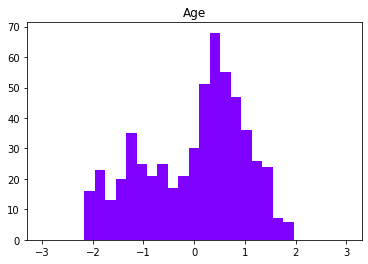

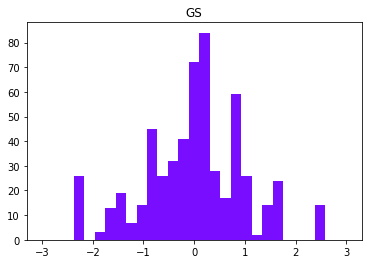

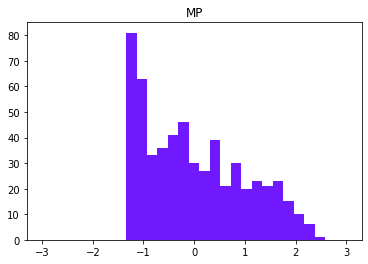

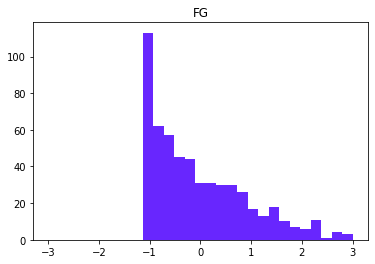

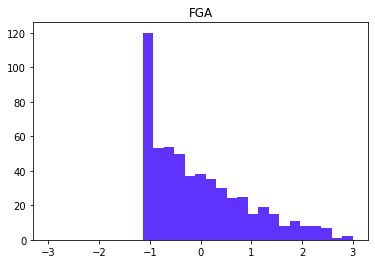

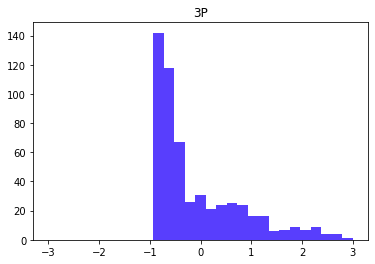

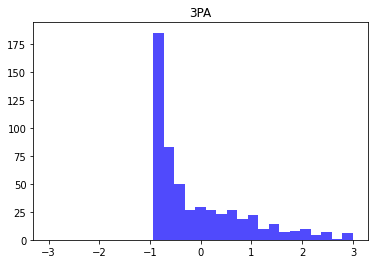

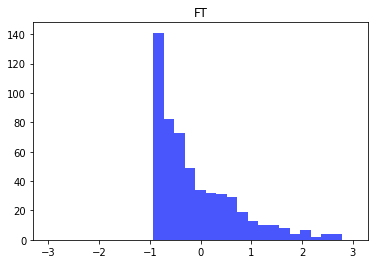

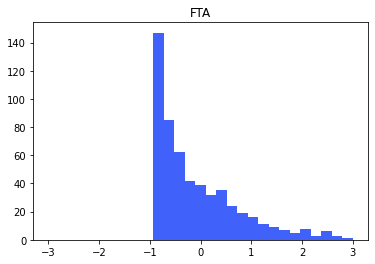

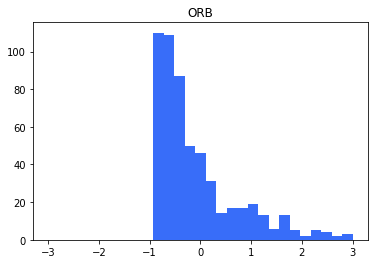

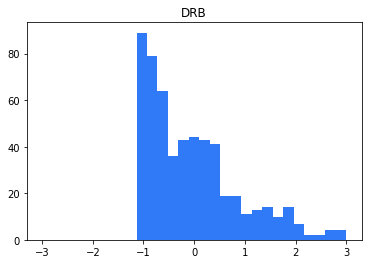

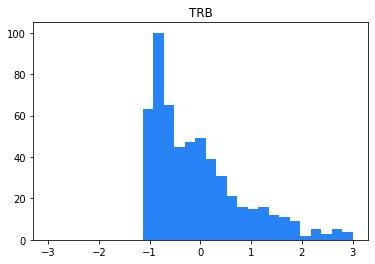

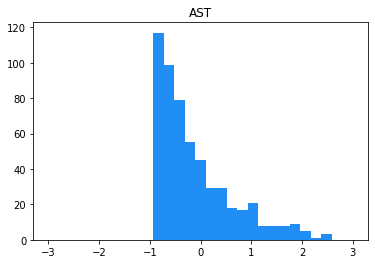

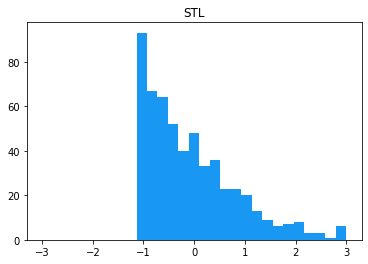

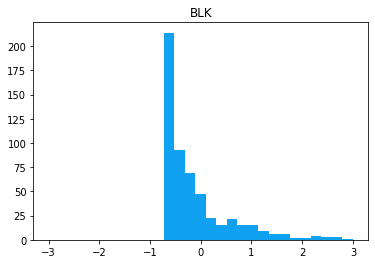

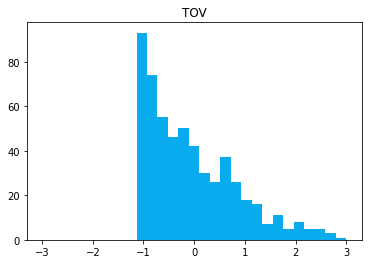

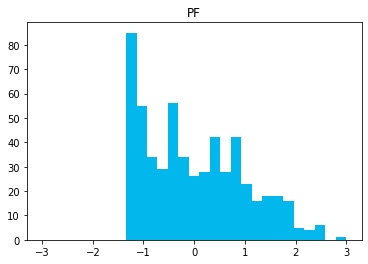

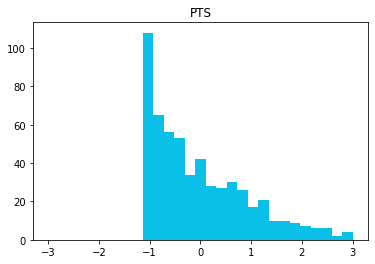

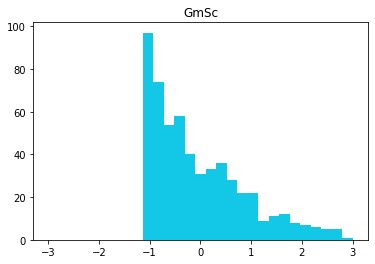

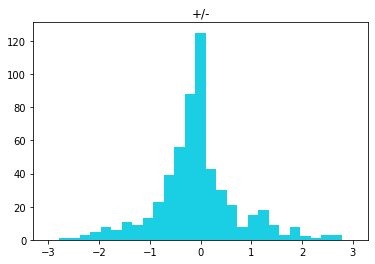

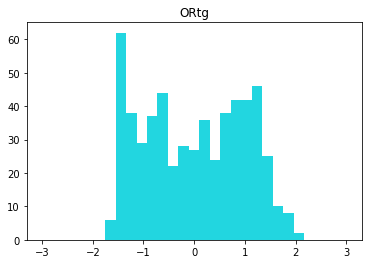

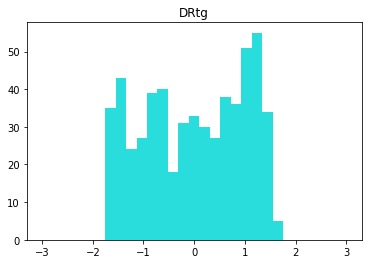

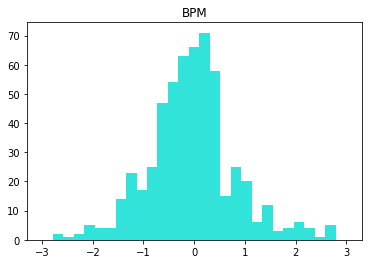

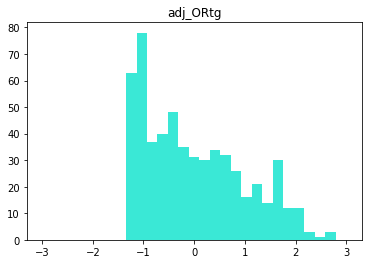

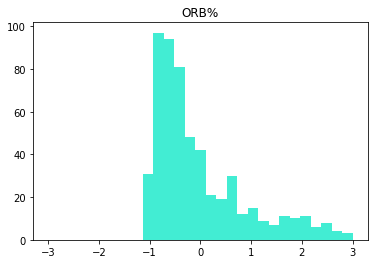

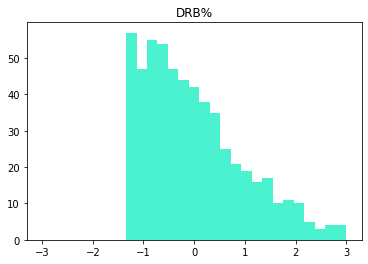

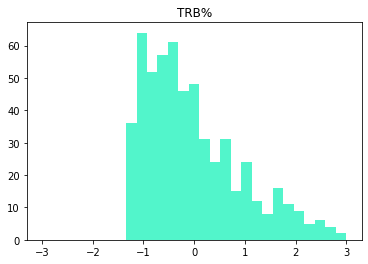

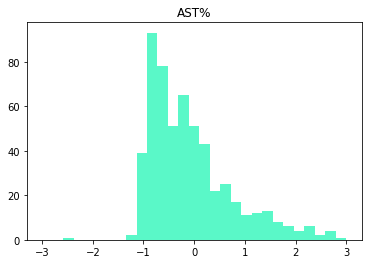

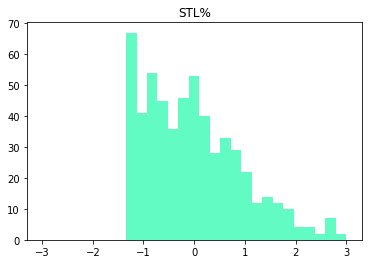

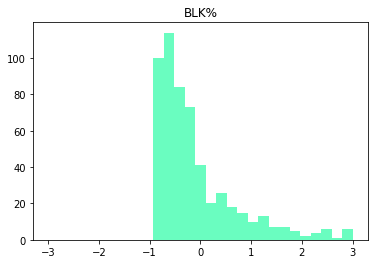

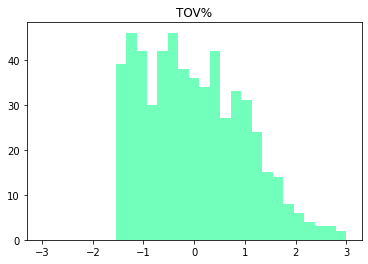

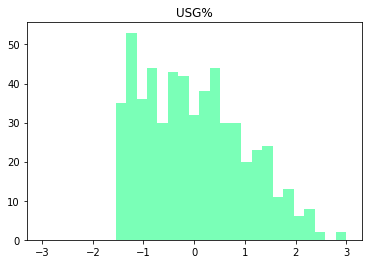

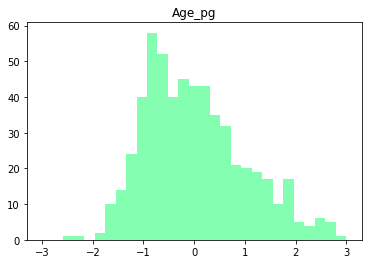

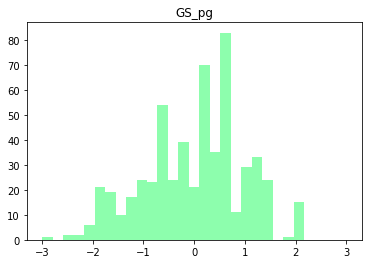

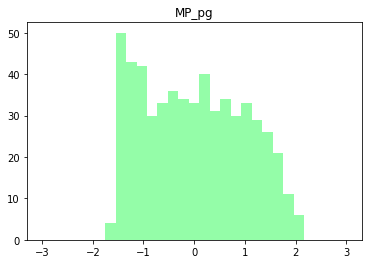

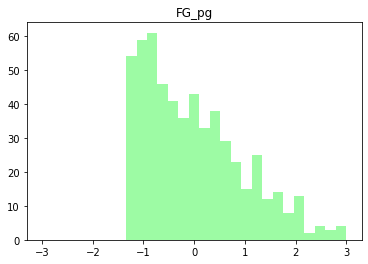

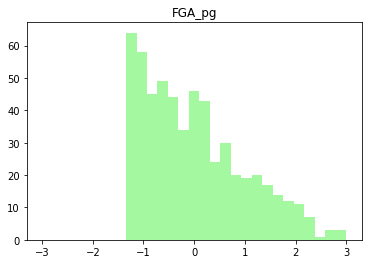

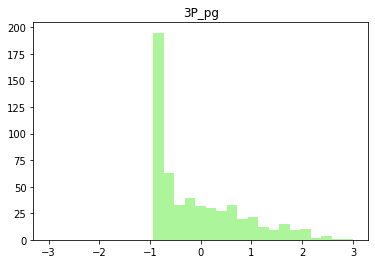

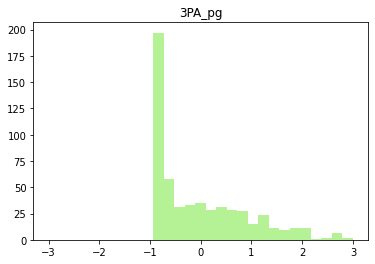

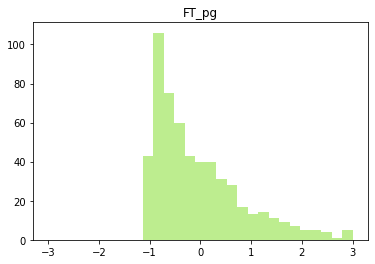

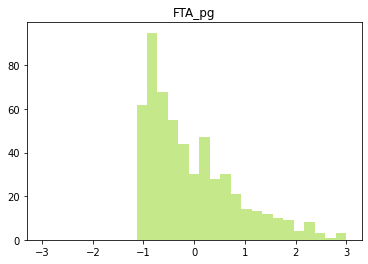

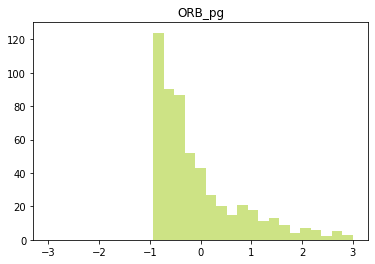

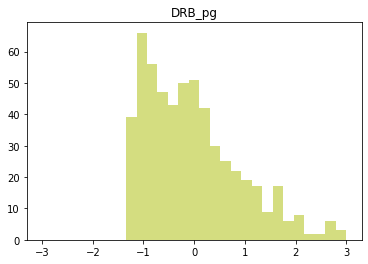

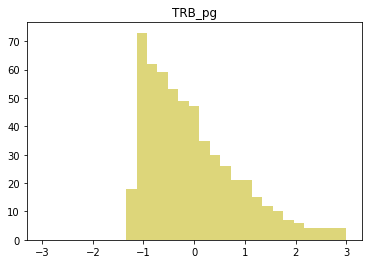

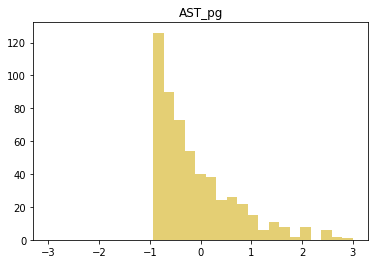

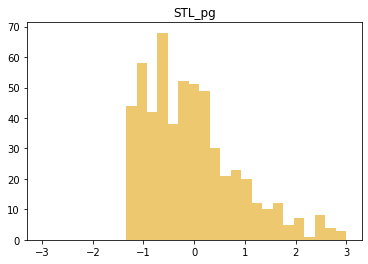

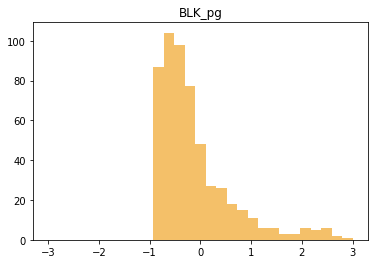

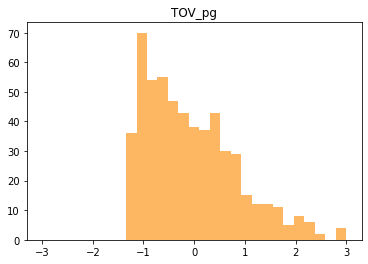

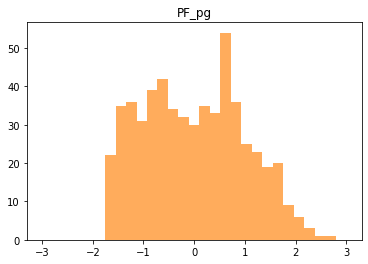

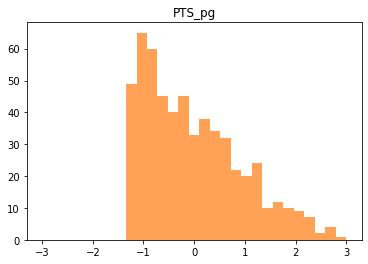

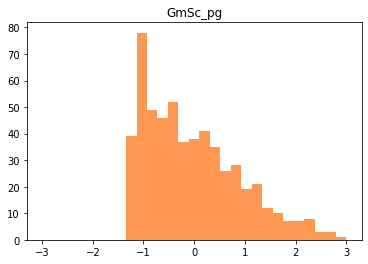

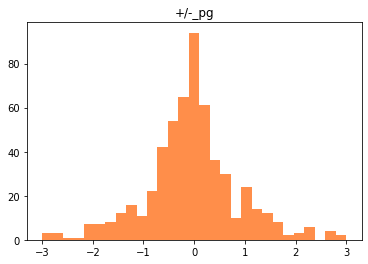

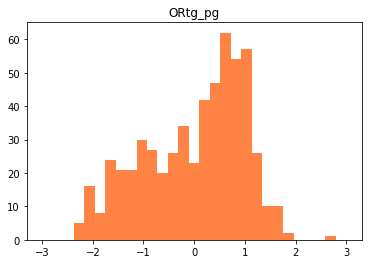

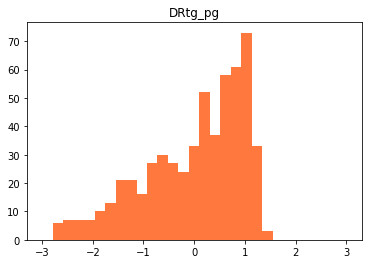

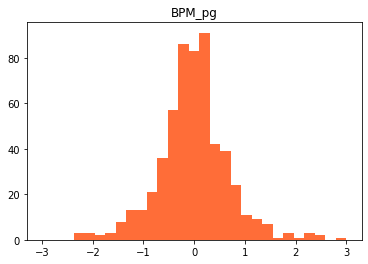

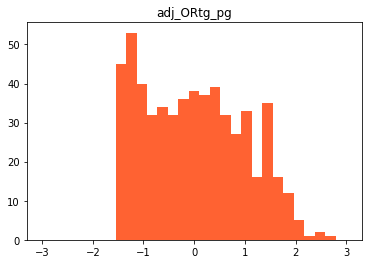

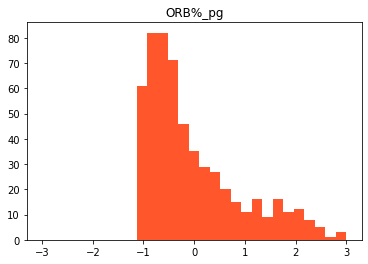

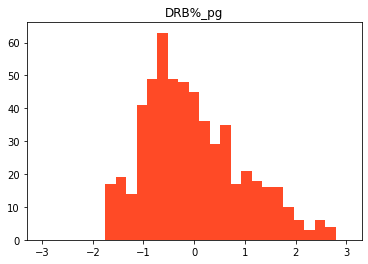

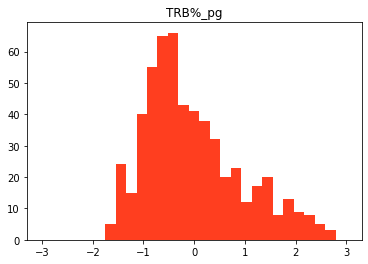

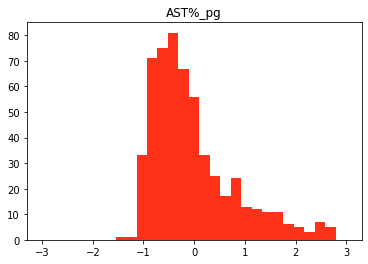

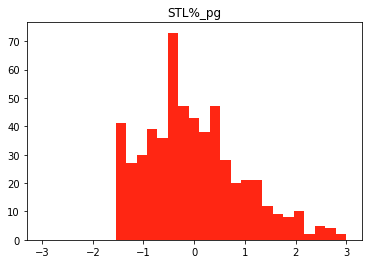

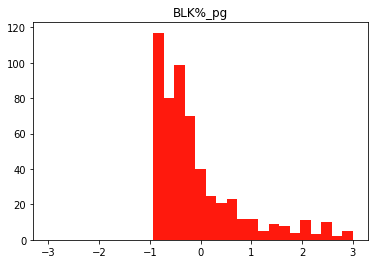

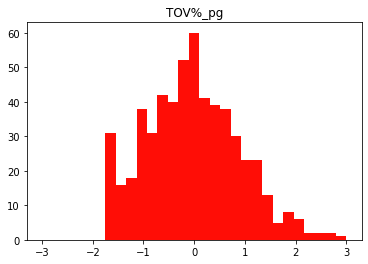

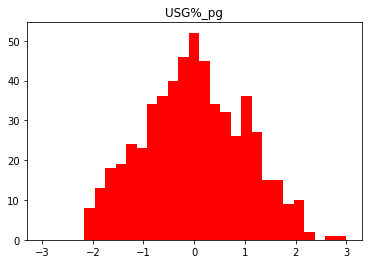

In [817]:
color = iter(cm.rainbow(np.linspace(0, 1, len(target_columns) + len(pg_columns))))
for stat in target_columns:
    plot_data(normalized_player_summed, stat, next(color))

for stat in pg_columns:
    plot_data(normalized_player_summed, stat, next(color))


C:\Users\jleus\AppData\Local\Temp/ipykernel_5840/1480662878.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(4, 3)


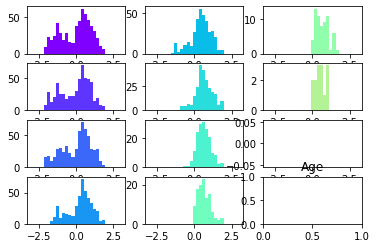

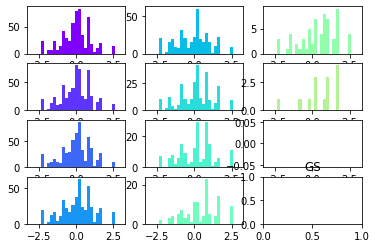

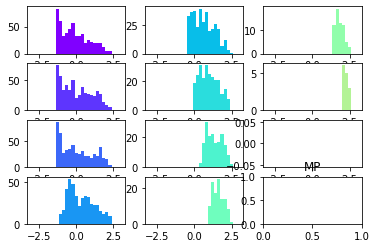

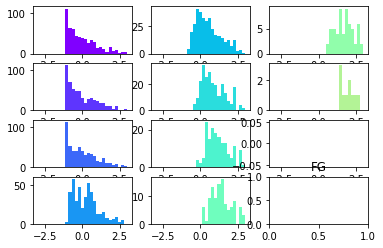

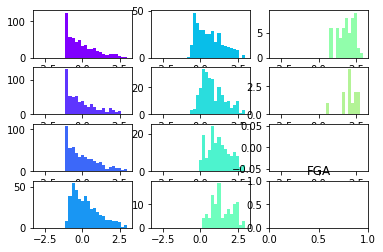

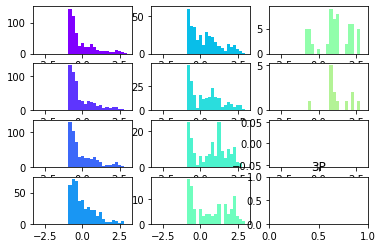

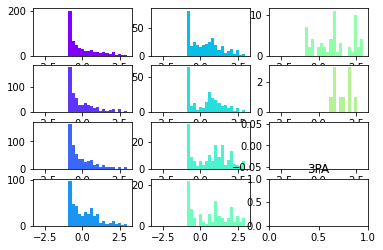

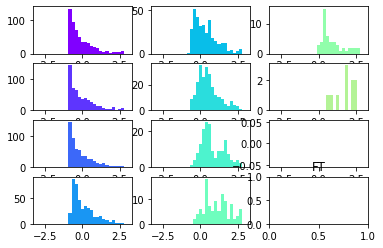

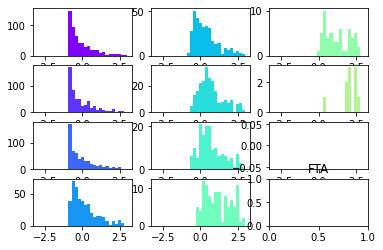

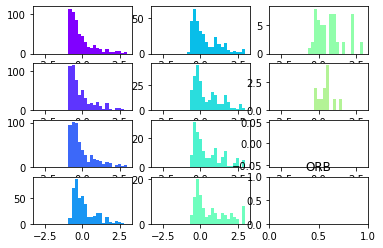

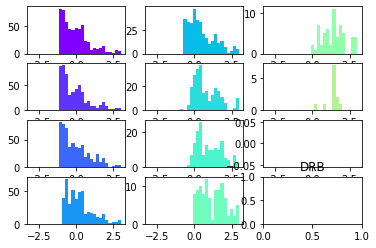

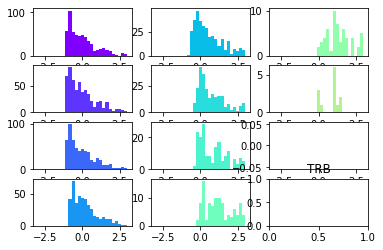

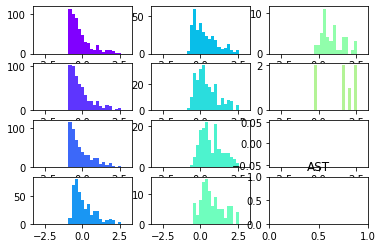

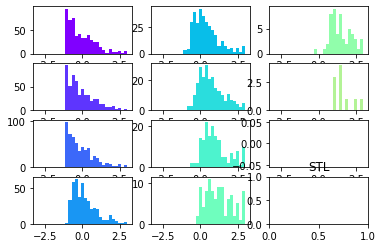

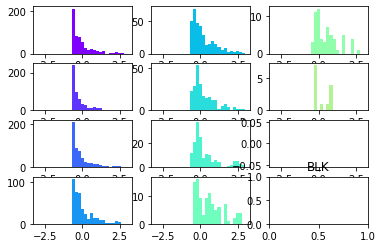

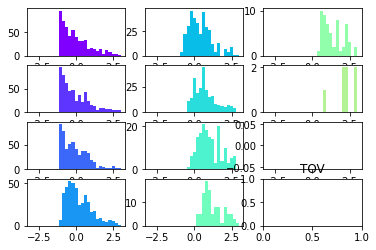

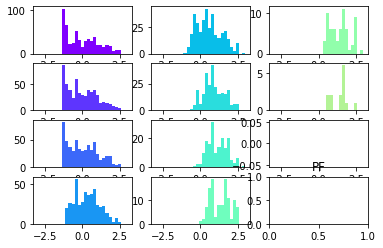

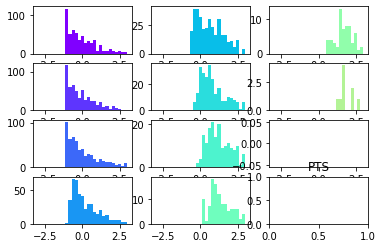

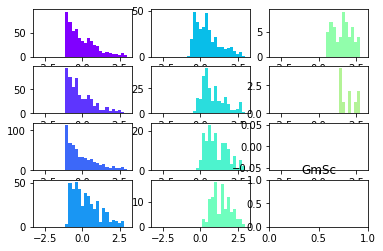

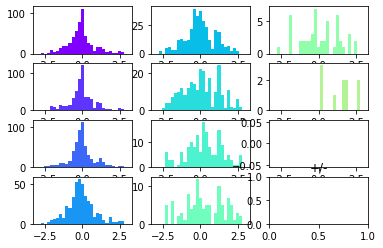

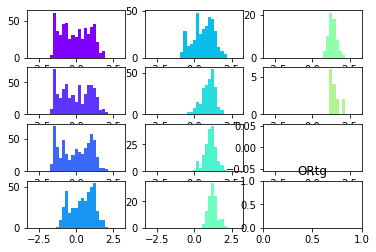

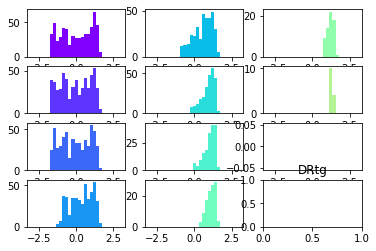

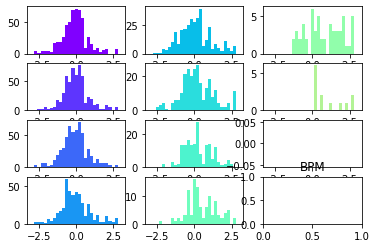

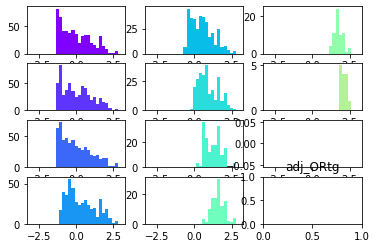

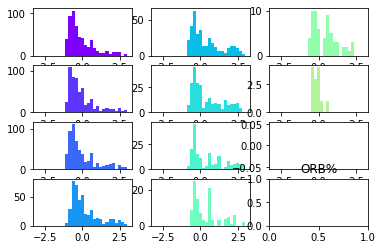

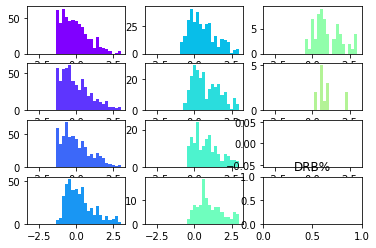

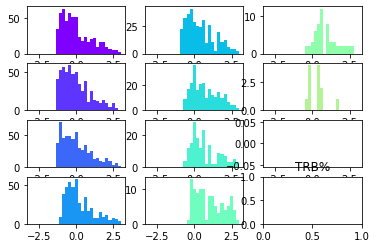

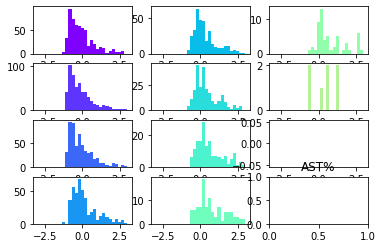

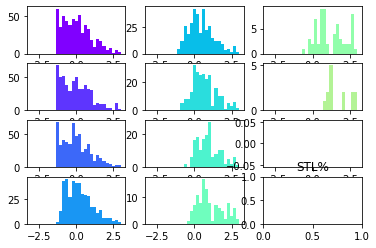

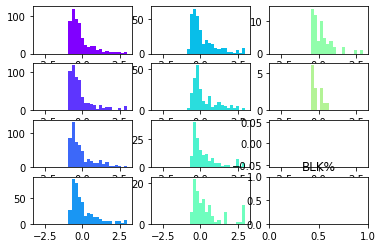

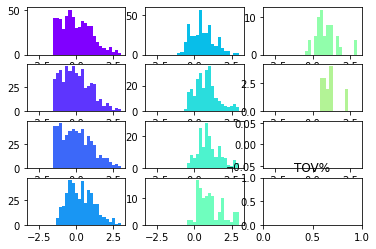

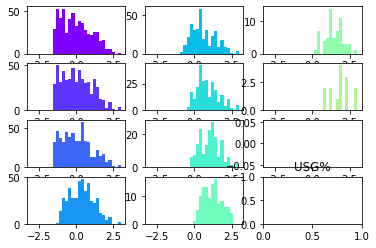

In [805]:
dfs = data_by_std(normalized_player_summed, 'MP')
dfs
big_stat_array = []
x=0
for stat in target_columns:
    big_stat_array.append(gather_target_stat_data(stat, normalized_player_summed))
    big_stat_array[x] = standerdize_data_length(big_stat_array[x])
    plot_stat_data_by_std(big_stat_array[x], stat)
    # try:
    #     plt.savefig(f'{stat}_single_std_data.png')
    # except:
    #     pass
    filenum = str(x)
    x+=1

C:\Users\jleus\AppData\Local\Temp/ipykernel_5840/1480662878.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(4, 3)


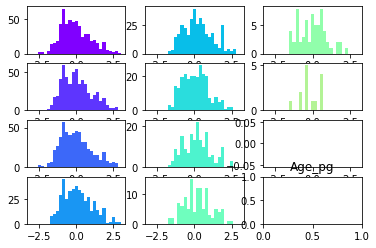

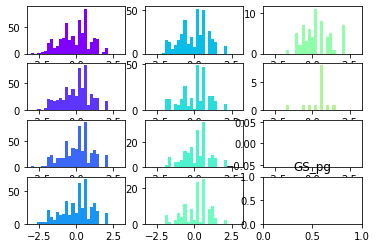

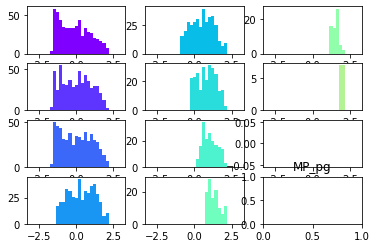

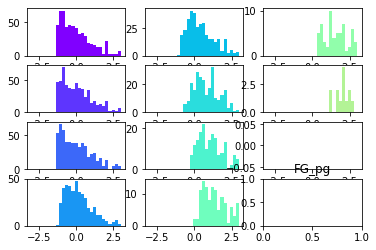

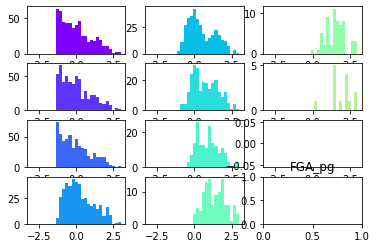

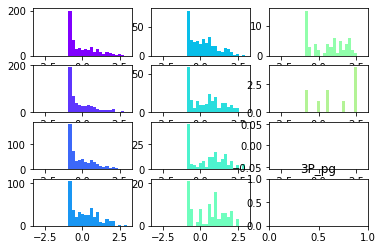

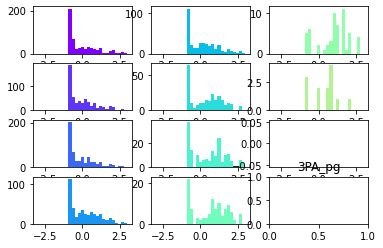

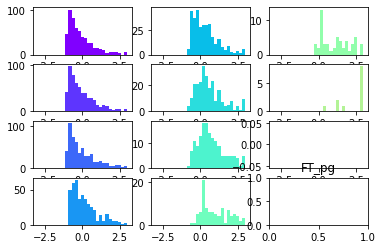

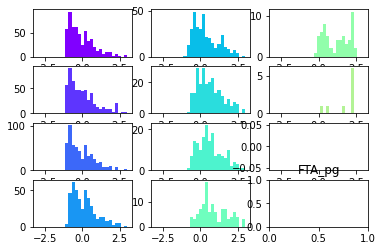

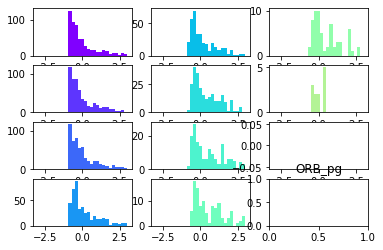

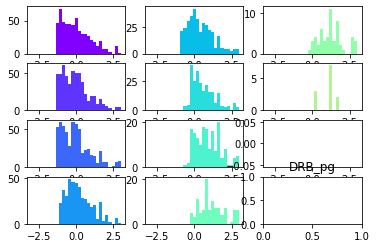

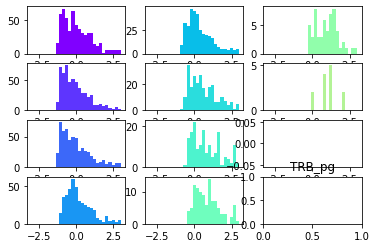

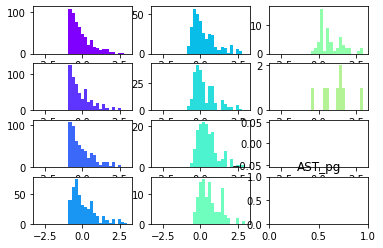

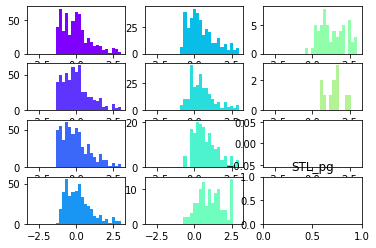

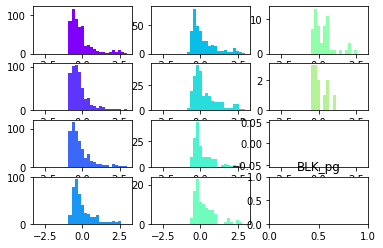

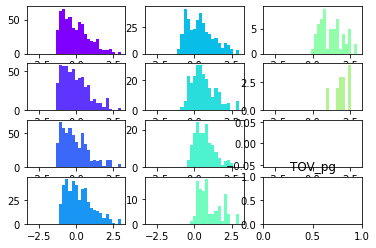

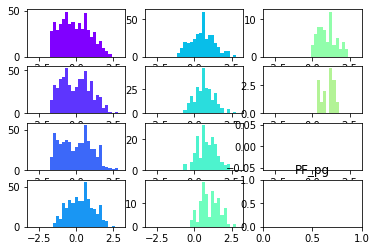

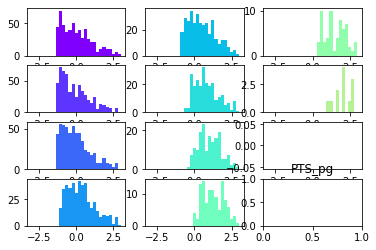

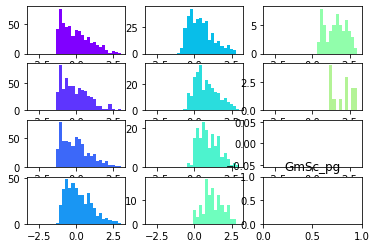

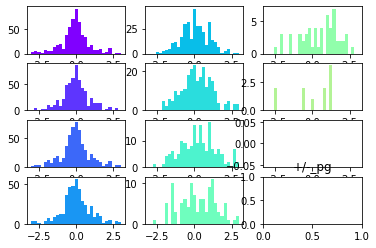

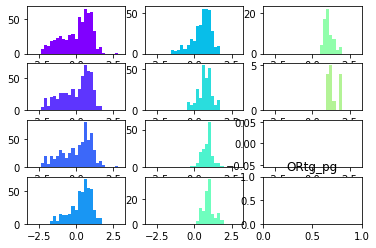

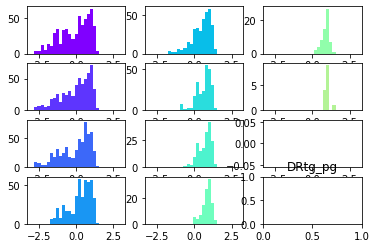

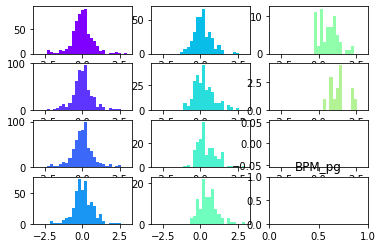

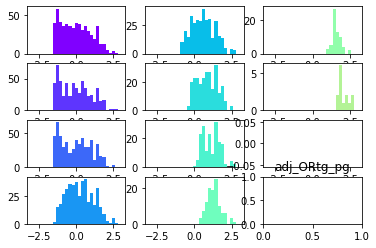

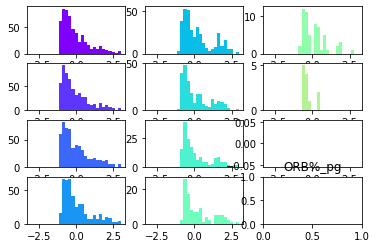

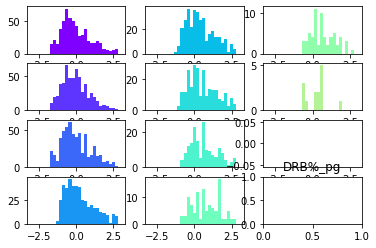

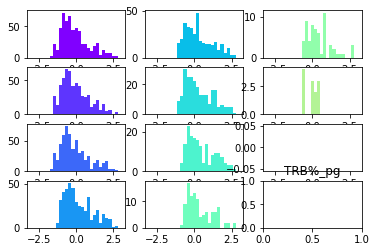

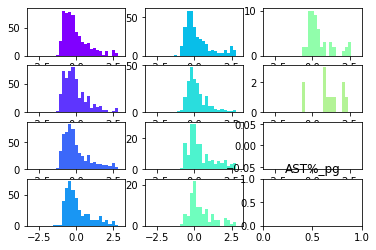

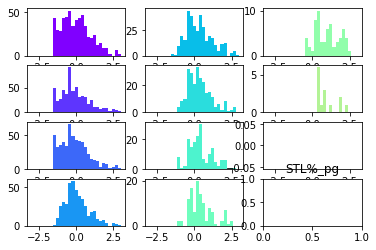

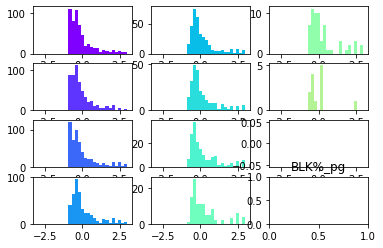

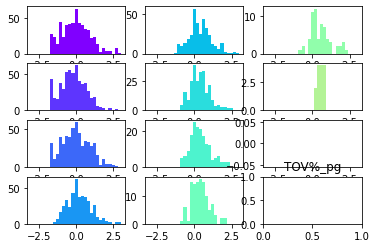

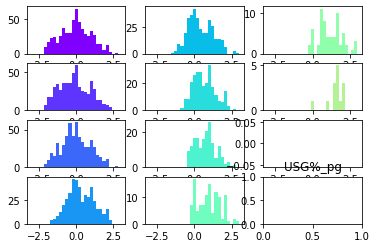

In [806]:
big_stat_array = []
x=0
for stat in pg_columns:
    big_stat_array.append(gather_target_stat_data(stat, normalized_player_summed))
    big_stat_array[x] = standerdize_data_length(big_stat_array[x])
    plot_stat_data_by_std(big_stat_array[x], stat)
    # try:
    #     plt.savefig(f'{stat}_single_std_data.png')
    # except:
    #     pass
    filenum = str(x)
    x+=1

In [807]:
# factor = (2/3) - (0.5 * (league_summed['AST'] / league_summed['FG'])) / (2 * (league_summed['FG'] / league_summed['FT']))
# VOP = league_summed['PTS'] / (league_summed['FG'] - league_summed['ORB'] + league_summed['TOV'] + 0.44 * league_summed['FTA'])
# DRB = (league_summed['TRB'] - league_summed['ORB']) / league_summed['TRB']

In [808]:
# def calc_uPER(factor, VOP, DRB, MP, three_pt, AST, team_AST, team_FG, TOV, FGA, FG, FTA, FT, PF, TRB, ORB, STL, BLK, lg_FT, lg_PF, lg_FTA):
#     if MP == 0:
#         return 0
#     uPER = ((1.0 / MP) *
#            (three_pt
#           + (2/3) * AST
#           + (2 - factor * (team_AST / team_FG)) * FG
#           + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
#           - VOP * TOV
#           - VOP * DRB * (FGA - FG)
#           - VOP * 0.44 * (0.44 + (0.56 * DRB)) * (FTA - FT)
#           + VOP * (1 - DRB) * (TRB - ORB)
#           + VOP * DRB * ORB
#           + VOP * STL
#           + VOP * DRB * BLK
#           - PF * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP)))
#     print(uPER)
#     return uPER

In [809]:
# per_player_stats = ['MP', '3P', 'AST', 'TOV', 'FGA', 'FG', 'FTA', 'FT', 'PF', 'TRB', 'ORB', 'STL', 'BLK']

In [810]:
# lg_FT = league_summed['FT']
# lg_PF = league_summed['PF']
# lg_FTA = league_summed['FTA']
# player_summed['uPER'] = 0.0

In [811]:
# per_stat_dict = {}
# for i in range(len(player_summed)):
#     try:
#         for stat in per_player_stats:
#             per_stat_dict[stat] = player_summed.loc[i, stat]
#         team = player_summed.loc[i, 'Tm']
#         team_AST = team_summed.loc['AST', team]
#         team_FG = team_summed.loc['FG', team]
#         uPER = calc_uPER(factor, VOP, DRB, per_stat_dict['MP'], per_stat_dict['3P'], per_stat_dict['AST'], team_AST, team_FG,
#                          per_stat_dict['TOV'], per_stat_dict['FGA'], per_stat_dict['FG'], per_stat_dict['FTA'], per_stat_dict['FT'],
#                          per_stat_dict['PF'], per_stat_dict['TRB'], per_stat_dict['ORB'], per_stat_dict['STL'], per_stat_dict['BLK'],
#                          lg_FT, lg_PF, lg_FTA)
#         player_summed.at[i, 'uPER'] = uPER
#     except:
#         player_summed.at[i, 'uPER'] = 0



In [812]:
# player_summed[player_summed['uPER'] > 0.008]

In [813]:
# league_summed
